In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Getting data
from google.colab import files
uploadedData = files.upload()

Saving CSV.csv to CSV.csv


In [ ]:
#Store data
aapl = pd.read_csv('CSV.csv')
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,25.719999,25.980000,25.570000,25.959999,24.955648,105300
1,2018-01-03,25.959999,26.309999,25.639999,26.209999,25.195978,119400
2,2018-01-04,26.400000,26.709999,26.270000,26.459999,25.436306,130600
3,2018-01-05,26.520000,26.670000,26.270000,26.420000,25.397854,69900
4,2018-01-08,26.420000,26.809999,26.280001,26.709999,25.676634,110500
...,...,...,...,...,...,...,...
645,2020-07-27,18.940001,19.469999,18.629999,19.420000,19.344584,100600
646,2020-07-28,19.299999,19.959999,18.910000,19.650000,19.573689,144500
647,2020-07-29,21.870001,23.900000,21.450001,23.299999,23.209515,369500
648,2020-07-30,22.920000,23.170000,22.250000,23.100000,23.010292,216100


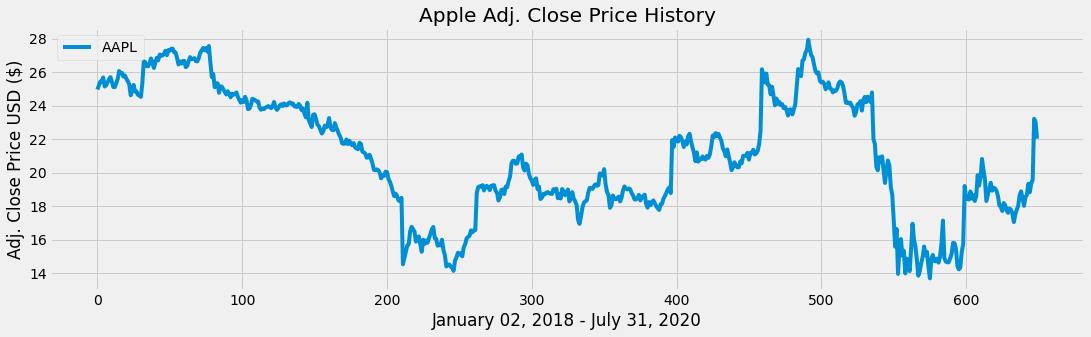

In [ ]:
#Visualized data
plt.figure(figsize=(16.5,4.5))
plt.plot(aapl['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('January 02, 2018 - July 31, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Simple Moving avg, 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = aapl['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
645,18.348798
646,18.366397
647,18.493899
648,18.630367


In [ ]:
#Simple Moving avg, 100 day avg
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = aapl['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
645,16.924862
646,16.913433
647,16.941336
648,16.980133


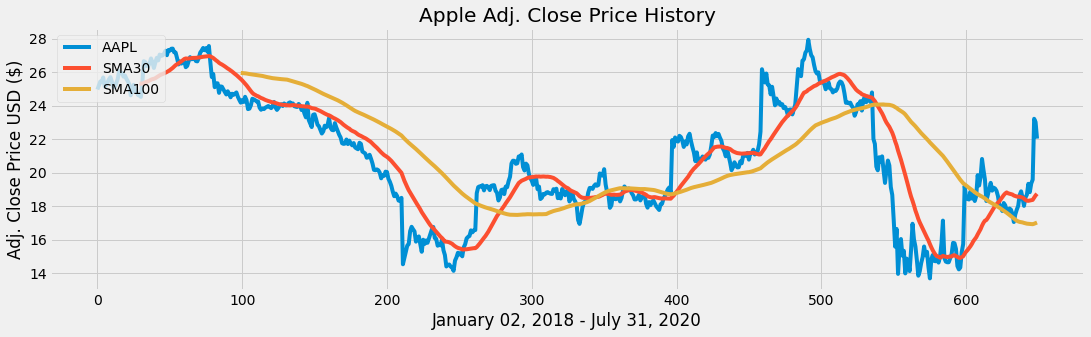

In [ ]:
#Visualzed 
plt.figure(figsize=(16.5,4.5))
plt.plot(aapl['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('January 02, 2018 - July 31, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Data frame to store all data
data = pd.DataFrame()
data['AAPL'] = aapl['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,24.955648,NaN,NaN
1,25.195978,NaN,NaN
2,25.436306,NaN,NaN
3,25.397854,NaN,NaN
4,25.676634,NaN,NaN
...,...,...,...
645,19.344584,18.348798,16.924862
646,19.573689,18.366397,16.913433
647,23.209515,18.493899,16.941336
648,23.010292,18.630367,16.980133


In [ ]:
#Function for when to buy or sell
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  count = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]: #Buy Signal
      if count !=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        count = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]: #Sell Signal
      if count != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['AAPL'][i])
          count = 0
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)

In [ ]:
#Store buy and sell
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
#Show data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,24.955648,NaN,NaN,NaN,NaN
1,25.195978,NaN,NaN,NaN,NaN
2,25.436306,NaN,NaN,NaN,NaN
3,25.397854,NaN,NaN,NaN,NaN
4,25.676634,NaN,NaN,NaN,NaN
...,...,...,...,...,...
645,19.344584,18.348798,16.924862,NaN,NaN
646,19.573689,18.366397,16.913433,NaN,NaN
647,23.209515,18.493899,16.941336,NaN,NaN
648,23.010292,18.630367,16.980133,NaN,NaN


<function matplotlib.pyplot.show>

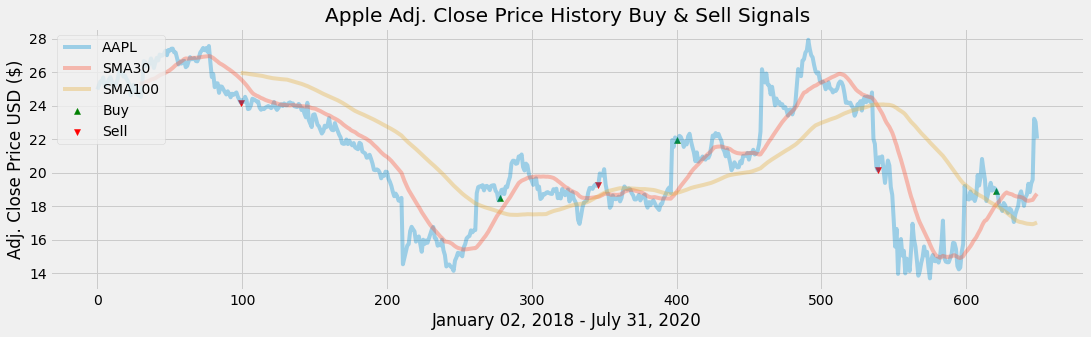

In [ ]:
#Visualize data and strategy
plt.figure(figsize=(16.5,4.5))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('January 02, 2018 - July 31, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show